# Agrupamento via K-Means

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import common as com
import clustering

import sklearn.datasets as datasets

np.random.seed(12345)

x, y = datasets.make_blobs(n_samples=100, centers=4, cluster_std=1, random_state=12345)

#labels = list(range(6))
#colors = ['green', 'blue', 'red', 'black', 'orange', 'magenta', 'cyan']

def plot_data(x, y, marker='o', legend=False, color=None):
    labels = np.unique(y)
    colors = plt.cm.hsv(np.linspace(0, 0.9, labels.shape[0]))
    plt.rcParams.update({'font.size': com.fontsize})
    for i, label in enumerate(labels):
        if color == 'bw':
            plt.scatter(x[y == label,0], x[y == label,1], s=10*com.markersize, marker=marker, color='k')  
        else:    
            plt.scatter(x[y == label,0], x[y == label,1],
                        s=10*com.markersize, marker=marker, color=colors[i])      
            
    if legend:
        plt.legend()
        
    
fig = plt.figure(figsize=com.figsize)
plot_data(x, y)
#plt.savefig('figs/clustering_data.png', dpi=com.dpi)
plt.show()
xlim = fig.gca().get_xlim() 
ylim = fig.gca().get_ylim() 

<Figure size 800x600 with 1 Axes>

## Dendrograma

/home/384341/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


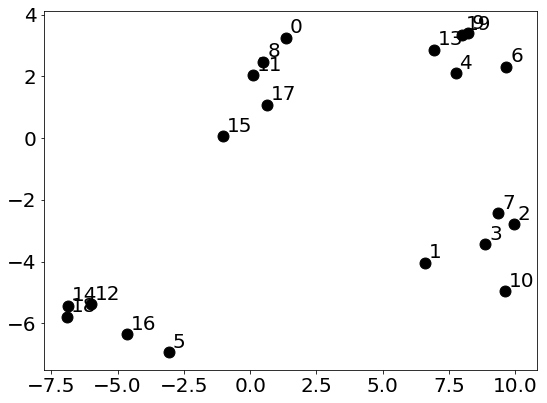

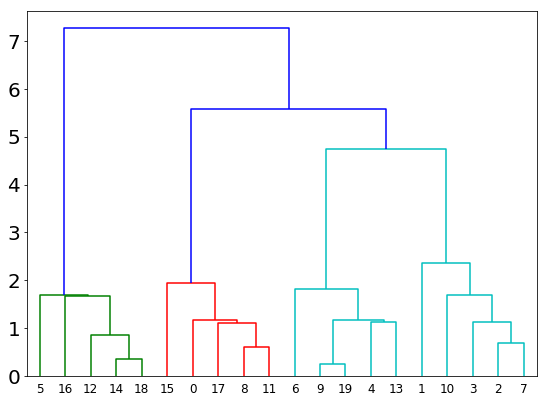

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage

x_dend, _ = datasets.make_blobs(n_samples=20, centers=4, cluster_std=1, random_state=12345)
fig = plt.figure(figsize=com.figsize)
plot_data(x_dend, _, color='bw')
for i, xi in enumerate(x_dend):
    plt.text(xi[0] + 0.15, xi[1] + 0.15, i)
#plt.savefig('figs/clustering_dend_data.png', dpi=com.dpi)
    
plt.figure(figsize=com.figsize)
dend = dendrogram(linkage(x_dend))
#plt.savefig('figs/dendrogram.png', dpi=com.dpi)

## K-means

In [3]:
K = 4
num_rep = 10

kmeans_result = clustering.kmeans(x, K=K, num_rep=num_rep)
cluster_index = kmeans_result['cluster_index']
centroids = kmeans_result['centroids']
loss_history = kmeans_result['loss']

plt.figure(figsize=com.figsize)
plt.rcParams.update({'font.size': com.fontsize})
plt.plot(range(1,len(loss_history)+1), loss_history, '-k', label='Clustering loss')
plt.xlabel('Iterations', fontsize=com.fontsize)
plt.ylabel('Reconstruction error', fontsize=com.fontsize)

fig = plt.figure(figsize=com.figsize)
plot_data(x, cluster_index)
labels = np.unique(cluster_index)
colors = plt.cm.hsv(np.linspace(0, 0.9, labels.shape[0]))
for k in range(K):
    plt.scatter(centroids[k,0], centroids[k,1], s=300, facecolors='w', edgecolors='k', linewidth=3)
    plt.scatter(centroids[k,0], centroids[k,1], s=20, color='k')

NameError: name 'max_inter' is not defined

In [ ]:
distance_metric = 'euclidean'
max_iter = 50
num_rep = 10
K_range = [2, 3, 4, 5]

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16,12))

loss_list = []
db_list = []
for i, K in enumerate(K_range):
    
    kmeans_result = clustering.kmeans(x, K, distance_metric=distance_metric, max_iter=max_iter, num_rep=num_rep)
    cluster_index = kmeans_result['cluster_index']
    centroids = kmeans_result['centroids']
    loss_history = kmeans_result['loss']
   
    labels = np.unique(cluster_index)
    colors = plt.cm.hsv(np.linspace(0, 0.9, labels.shape[0]))

    axs.flatten()[i].set_xlim(xlim)
    axs.flatten()[i].set_ylim(ylim)
    for j, label in enumerate(np.unique(cluster_index)):
        axs.flatten()[i].scatter(x[cluster_index == label,0], x[cluster_index == label,1],
                        s=10*com.markersize, marker='o', color=colors[j])  
    for k in range(K):
        axs.flatten()[i].scatter(centroids[k,0], centroids[k,1], s=300, facecolors='w', edgecolors='k', linewidth=5)
        axs.flatten()[i].scatter(centroids[k,0], centroids[k,1], s=20, color='k')
    
    db_list.append(clustering.db_index(x, kmeans_result))
    axs.flatten()[i].set_title("K = %d, Reconstruction error = %.2f\nDB index = %.4f" %
                               (K, loss_history[-1], db_list[-1]))
    
    loss_list.append(loss_history[-1])
        
#plt.savefig('figs/kmeans.png', dpi=com.dpi)

plt.figure(figsize=com.figsize)
plt.rcParams.update({'font.size': com.fontsize})
plt.plot(K_range, loss_list, '-k', label='Clustering loss')
plt.xlabel('K', fontsize=com.fontsize)
plt.ylabel('Reconstruction error', fontsize=com.fontsize)

#plt.savefig('figs/kmeans_error.png', dpi=com.dpi)

plt.figure(figsize=com.figsize)
plt.rcParams.update({'font.size': com.fontsize})
plt.plot(K_range, db_list, '-k', label='DB index')
plt.xlabel('K', fontsize=com.fontsize)
plt.ylabel('DB index', fontsize=com.fontsize)

#plt.savefig('figs/kmeans_db_index.png', dpi=com.dpi)